In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 239 (delta 70), reused 0 (delta 0), pack-reused 120
Receiving objects: 100% (239/239), 20.21 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [2]:
! pip3 install mapclassify

In [3]:
# Import all necessary packages
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

# county data cleaning and merging

In [4]:
# Load county data for 2012~
df_2012 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds191_20125_county_E.csv', encoding='latin-1')
#df_2012.head()

# Filter Virginia data only
df_2012 = df_2012.loc[(df_2012['STATE'] == "Virginia")]

# Select Median Household Income, Median Gross, Rent, Median Home Value, and County data for new dataframe
df_2012 = df_2012.loc[1:,['QU1E001', 'QZTE001', 'QZ6E001', 'COUNTY']]

# Set all Year values to 2012 (address this choice in the paper)
df_2012['Year'] = 2012

# Rename columns for readability
df_2012 = df_2012.rename(columns={"QU1E001": "Median Household Income", "QZTE001": "Median Gross Rent", "QZ6E001": "Median Home Value", "COUNTY": "County"})

# Strip string, " County" from county values and make all uppercase to match voting_VA.csv county values
df_2012['County'] = df_2012['County'].str.replace(' County', '')
df_2012['County'] = df_2012['County'].str.upper()

# 'QXSE001' (employment variable)

print(df_2012.head())
df_2012.shape


     Median Household Income Median Gross Rent Median Home Value     County  \
2821                   40780               741            153800   ACCOMACK   
2822                   67797              1080            332400  ALBEMARLE   
2823                   46133               546            117700  ALLEGHANY   
2824                   50596               823            201100     AMELIA   
2825                   45020               637            151800    AMHERST   

      Year  
2821  2012  
2822  2012  
2823  2012  
2824  2012  
2825  2012  


(134, 5)

In [5]:
# Load county data for 2016~
df_2016 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds225_20165_county_E.csv', encoding='latin-1')
# df_2016.head()

# Filter Virginia data only
df_2016 = df_2016.loc[(df_2016['STATE'] == "Virginia")]

# Select Median Household Income, Median Gross, Rent, Median Home Value, and County data for new dataframe
df_2016 = df_2016.loc[1:,['AF49E001', 'AF89E001', 'AF9LE001', 'COUNTY']]

# Set all Year values to 2016 (address this choice in the paper)
df_2016['Year'] = 2016

# Rename columns for readability
df_2016 = df_2016.rename(columns={"AF49E001": "Median Household Income", "AF89E001": "Median Gross Rent", "AF9LE001": "Median Home Value", "COUNTY": "County"})

# Strip string, " County" from county values and make all uppercase to match voting_VA.csv county values
df_2016['County'] = df_2016['County'].str.replace(' County', '')
df_2016['County'] = df_2016['County'].str.upper()

print(df_2016.head())
df_2016.shape

     Median Household Income Median Gross Rent Median Home Value     County  \
2821                   38503               749            151900   ACCOMACK   
2822                   70342              1156            317300  ALBEMARLE   
2823                   45538               636            111500  ALLEGHANY   
2824                   58269               689            171500     AMELIA   
2825                   47002               696            149400    AMHERST   

      Year  
2821  2016  
2822  2016  
2823  2016  
2824  2016  
2825  2016  


(133, 5)

In [6]:
# Load county data for 2020~
df_2020 = pd.read_csv('DS-3001-Projects/Project 3/countydata/0002_ds249_20205_county_E.csv', encoding='latin-1')
#df_2020.head()

# Filter Virginia data only
df_2020 = df_2020.loc[(df_2020['STATE'] == "Virginia")]

# Select Median Household Income, Median Gross, Rent, Median Home Value, and County data for new dataframe
df_2020 = df_2020.loc[1:,['AMR8E001', 'AMVZE001', 'AMWBE001', 'COUNTY']]

# Set all Year values to 2020 (address this choice in the paper)
df_2020['Year'] = 2020

# Rename columns for readability
df_2020 = df_2020.rename(columns={"AMR8E001": "Median Household Income", "AMVZE001": "Median Gross Rent", "AMWBE001": "Median Home Value", "COUNTY": "County"})

# Strip string, " County" from county values and make all uppercase to match voting_VA.csv county values
df_2020['County'] = df_2020['County'].str.replace(' County', '')
df_2020['County'] = df_2020['County'].str.upper()

print(df_2020.head())
df_2020.shape

<ipython-input-6-803e31ecef06>:2: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,2

     Median Household Income Median Gross Rent Median Home Value     County  \
2822                 46178.0             825.0          173700.0   ACCOMACK   
2823                 84643.0            1349.0          376000.0  ALBEMARLE   
2824                 48513.0             616.0          121100.0  ALLEGHANY   
2825                 63918.0             846.0          215600.0     AMELIA   
2826                 57368.0             700.0          159900.0    AMHERST   

      Year  
2822  2020  
2823  2020  
2824  2020  
2825  2020  
2826  2020  


(133, 5)

In [7]:
# Combine all county data
frames = [df_2012, df_2016, df_2020]
df_comb = pd.concat(frames)
# print(df_comb.iloc[130:138]) # (used to check that years 2012 and 2016 values are present in dataframe)
# print(df_comb.iloc[263:271]) # (used to check that year 2016 and 2020 values are present in dataframe)
df_comb.shape

(400, 5)

# voting_VA.csv cleaning and merging with county data

In [79]:
# Load data

vdf_all = pd.read_csv('DS-3001-Projects/Project 3/voting_VA.csv') # Load historical voting data

In [80]:
# Rename columns to match county data
vdf = vdf_all
vdf = vdf.rename(columns={"year": "Year", "county_name": "County"})

# Calculate difference between democrat and republican candidate votes
rep_points = vdf[vdf['party'] == 'REPUBLICAN'].set_index(['Year', 'County'])
dem_points = vdf[vdf['party'] == 'DEMOCRAT'].set_index(['Year', 'County'])
difference = rep_points['candidatevotes'] - dem_points['candidatevotes']

# Add new difference column to dataframe
vdf = vdf.merge(difference.reset_index().rename(columns={'candidatevotes': 'Difference'}), on=['Year', 'County'], how='left')

# Select rows where party is either DEMOCRAT or REPUBLICAN (Not include Green or Other party)
vdf = vdf.loc[(vdf['party'] == 'DEMOCRAT') | (vdf['party'] == 'REPUBLICAN')]
#vdf.head(50)

# Select rows where Year is 2012, 2016, and 2020
vdf = vdf.loc[(vdf['Year'] == 2012) | (vdf['Year'] == 2016) | (vdf['Year'] == 2020)]
#vdf.head(50)

# vdf: Select Year, County, Difference from vdf_all
vdf = vdf.loc[:,['Year', 'County', 'Difference']]
vdf.head(50)

# vdf.head()
# vdf_2012 = vdf.loc[vdf["Year"]==2012]
# vdf_2012.head()
# # print(vdf.shape)
# # vdf = vdf.dropna()
# # print(vdf.shape)
# # vdf_2012.shape

# team1_points = vdf_2012[vdf_2012['party'] == 'DEMOCRAT'].set_index(['Year', 'County'])
# team2_points = vdf_2012[vdf_2012['party'] == 'REPUBLICAN'].set_index(['Year', 'County'])
# difference_t1_t2 = team1_points['candidatevotes'] - team2_points['candidatevotes']

# # Merge the difference back into the original dataframe
# vdf_2012 = vdf_2012.merge(difference_t1_t2.reset_index().rename(columns={'candidatevotes': 'Difference_T1_T2'}), on=['Year', 'County'], how='left')
# vdf_2012.head(50)

# fairfax_2012 = vdf_2012.loc[vdf_2012["County"]=="FAIRFAX"]
# fairfax_2012.head()

,Year,County,Difference
1440,2012,ACCOMACK,558
1441,2012,ACCOMACK,558
1443,2012,ALBEMARLE,-6460
1444,2012,ALBEMARLE,-6460
1446,2012,ALLEGHANY,192
1447,2012,ALLEGHANY,192
1449,2012,AMELIA,1841
1450,2012,AMELIA,1841
1452,2012,AMHERST,2976
1453,2012,AMHERST,2976


In [81]:
# Merge new vdf with county data, df_comb
vdf = pd.merge(df_comb, vdf, on=['Year', 'County'], how='outer')
print(vdf.head())
vdf.shape

  Median Household Income Median Gross Rent Median Home Value     County  \
0                   40780               741            153800   ACCOMACK   
1                   40780               741            153800   ACCOMACK   
2                   67797              1080            332400  ALBEMARLE   
3                   67797              1080            332400  ALBEMARLE   
4                   46133               546            117700  ALLEGHANY   

   Year  Difference  
0  2012       558.0  
1  2012       558.0  
2  2012     -6460.0  
3  2012     -6460.0  
4  2012       192.0  


(3037, 6)

In [82]:
# Check for missing values
vdf.isnull().sum()

Median Household Income    136
Median Gross Rent          136
Median Home Value          136
County                       0
Year                         0
Difference                  77
dtype: int64

In [83]:
# Drop missing values
vdf = vdf.dropna()

In [84]:
# Confirm no missing values
vdf.isnull().sum()

Median Household Income    0
Median Gross Rent          0
Median Home Value          0
County                     0
Year                       0
Difference                 0
dtype: int64

# visualizations

In [73]:
# Load shapefiles and data

# Before running this code chunk: manually download the VirginiaCounty_ClippedToShoreline.shp file from:
# https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about
# and upload it to the Google Colab cloned repo DS-3001-Projects/Project 3/shapefiles folder

gdf = gpd.read_file('DS-3001-Projects/Project 3/shapefiles/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('DS-3001-Projects/Project 3/county_adjacencies.csv') # Load county adjacency data and population data

In [74]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

<Axes: >

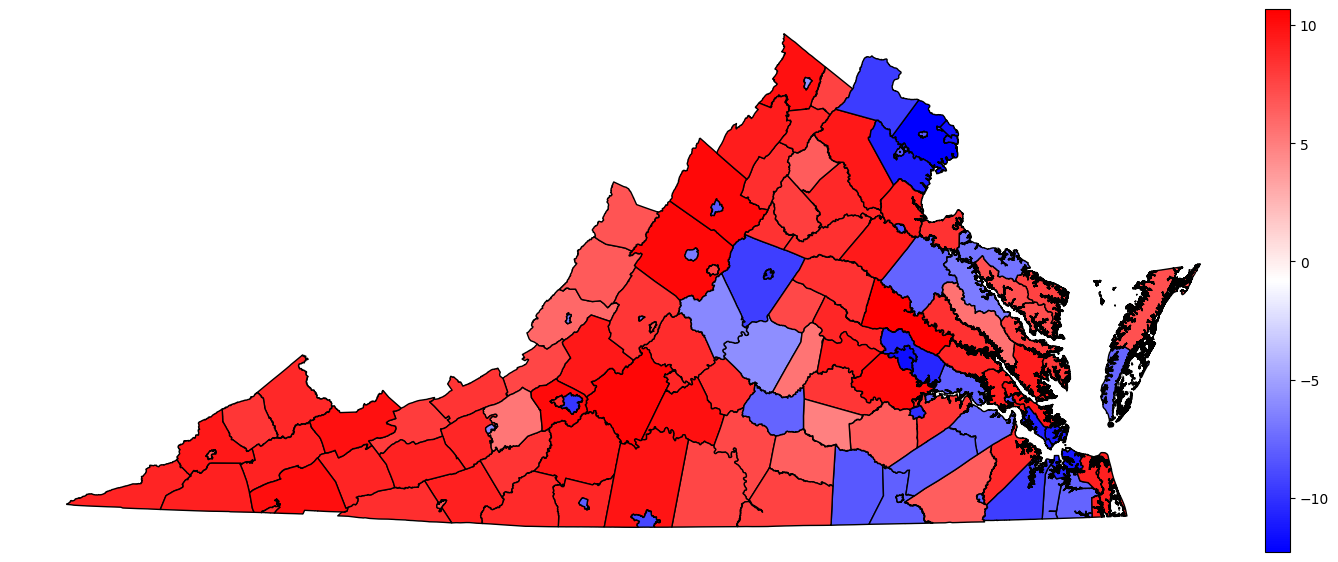

In [77]:
# 2012

vdf_2012 = vdf_all.loc[vdf_all['year']== 2012,:] # Only the 2012 data

dem_votes = vdf_2012.loc[(vdf_2012['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
dem_votes = dem_votes.rename('dem_votes_2012')
df = df.merge(dem_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

rep_votes = vdf_2012.loc[(vdf_2012['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
rep_votes = rep_votes.rename('rep_votes_2012')
df = df.merge(rep_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

df['vote_diff'] = df['rep_votes_2012']-df['dem_votes_2012']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

<Axes: >

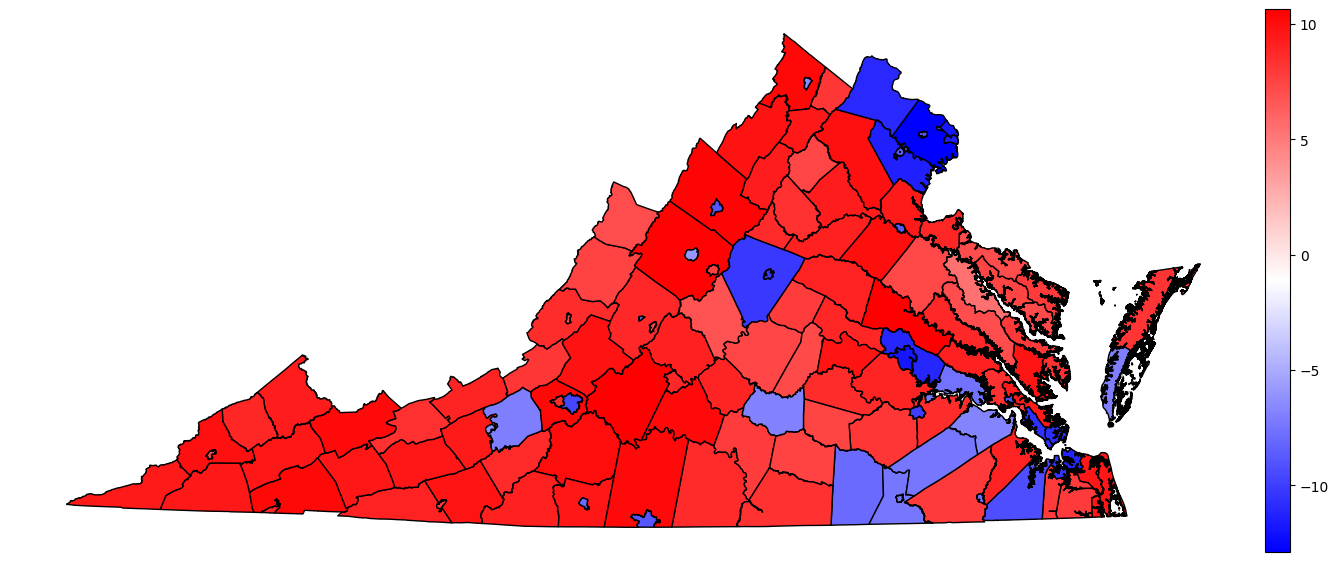

In [78]:
# 2016

vdf_2016 = vdf_all.loc[vdf_all['year']== 2016,:] # Only the 2016 data

dem_votes = vdf_2016.loc[(vdf_2016['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
dem_votes = dem_votes.rename('dem_votes_2016')
df = df.merge(dem_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

rep_votes = vdf_2016.loc[(vdf_2016['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
rep_votes = rep_votes.rename('rep_votes_2016')
df = df.merge(rep_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

df['vote_diff'] = df['rep_votes_2016']-df['dem_votes_2016']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

<Axes: >

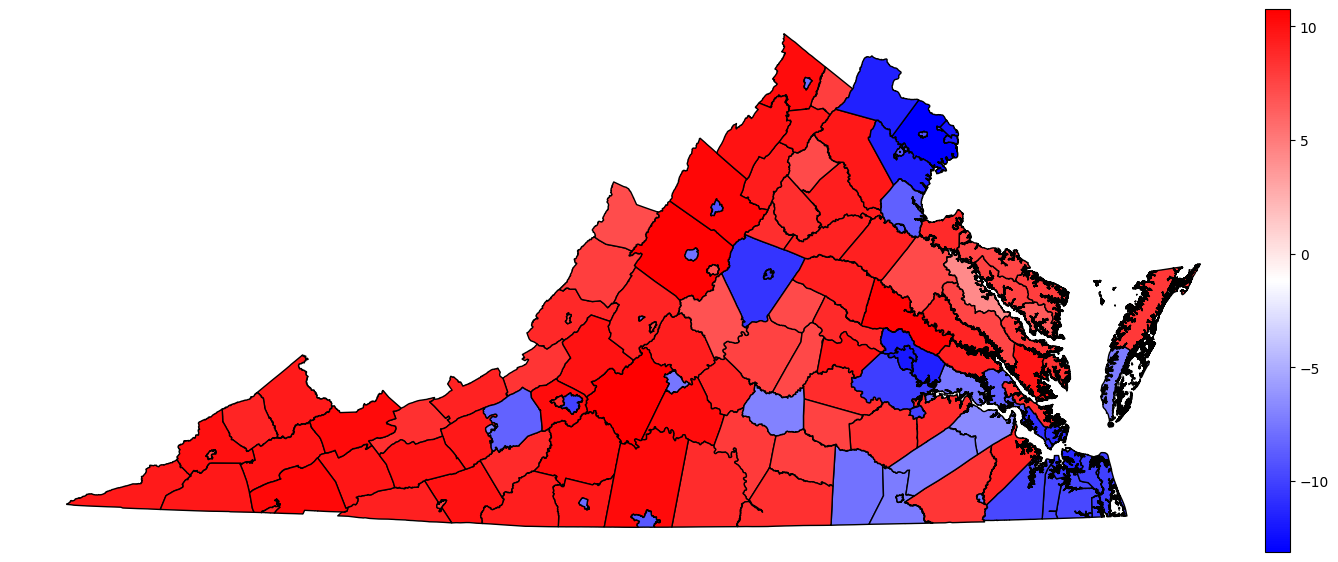

In [75]:
# 2020

vdf_2020 = vdf_all.loc[vdf_all['year']== 2020,:] # Only the 2020 data

dem_votes = vdf_2020.loc[(vdf_2020['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
dem_votes = dem_votes.rename('dem_votes_2020')
df = df.merge(dem_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

rep_votes = vdf_2020.loc[(vdf_2020['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
rep_votes = rep_votes.rename('rep_votes_2020')
df = df.merge(rep_votes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

# algorithms/models

In [85]:
# Finalize data from Pandas:
y = vdf['Difference']
Z = vdf.loc[:,['Median Household Income', 'Median Gross Rent', 'Median Home Value', 'County', 'Year'] ]

# Set up variable preprocessing:
cat_vars = ['County','Year']
num_vars = ['Median Household Income','Median Gross Rent', 'Median Home Value']

cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler())]) # Maxmin scaling

# Column transformer:
preprocessor = ColumnTransformer(
    transformers = [('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
                    ('num', num_pipeline, num_vars)]) # Transform num_vars by num_pipeline

# Create model-specific pipelines:
lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))]) # Link preprocessor to model
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('tree', DecisionTreeRegressor(max_depth = 6))]) # Link preprocessor to model

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(Z, y, # Feature and target variables
                                                    test_size=.2) # For replication purposes

# Fit the models:
lm = lm_pipe.fit(X_train, y_train)
tree = tree_pipe.fit(X_train, y_train)

# Extract results:
print('Linear Model rsq: ', lm.score(X_test, y_test) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients
y_hat_lm = lm.predict(X_test) # Predicted values

print('Tree rsq: ', tree.score(X_test, y_test) ) # R-squared
y_hat_tree = tree.predict(X_test)

Linear Model rsq:  0.3802344563319575
[ -4969.04461467    951.11999193   1376.29559305  -5248.35046564
    694.98139918  -1121.37084759  -2246.6145298  -10703.35969805
   8708.99886485  -3976.07806319   8138.59668527  -4785.08815402
   5723.71687115  -6528.59662491  -6341.1817949   -6824.56377033
  -3816.06106397  -5629.59538485    516.10298747   2679.78376735
  -4098.68600525  -1088.56647262  -7563.49394093  -3654.11613092
   9121.14112187   7306.63924857   9313.18477601   3144.82409131
  -5207.48347801  -3933.24182097   9658.20085227  -4518.78852148
  -9480.96167876  -9470.58627528   3737.1108985   -9691.66219968
  -2954.5813217  -58697.76640383  18866.31454281  28114.78363365
  16619.67790141  -4087.91975857   9398.67357171   -306.35505767
  -4047.07051074  13693.89213381   3554.53659126  -9856.66411906
  -1099.54336276   7234.25017579  11246.20021003  -7173.02965338
   5693.65798544  -2852.56263676  -6041.65713665  -7724.04881481
  19658.97067233  -5441.10820853 -11777.86608706  -5